# **Project Name**    - **FedEx Logistics Performance Analysis**



##### **Project Type**    - EDA

##### **Contribution**    - Individual  - Sujitha Arasavilli

# **Project Summary -**

# **GitHub Link -**

https://github.com/Sujitha-A/Capstone_2-FedEx_Logistics_Performance_Analysis.git

# **Problem Statement**


Business Context FedEx Logistics manages a complex global supply chain, dealing with shipments across various regions, countries, and industries.

The dataset provides an in-depth look at their logistics processes, capturing important information on purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details such as item descriptions and dosage forms. Effective management of these processes ensures timely delivery, minimizes freight costs, and improves customer satisfaction.

Given the rise of eCommerce and global distribution, companies like FedEx must continuously optimize their logistics operations to maintain a competitive edge.

The dataset is designed to provide insights into how shipments are managed, identify bottlenecks or delays, and ensure cost-effectiveness. By analyzing the data, FedEx Logistics aims to streamline supply chain operations, improving delivery timelines and reducing costs for both the company and its customers.

#### **Define Your Business Objective?**

Analyse the data to improve logistics operations

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# For data manipulation, cleaning, and analysis
import pandas as pd

# For efficient numerical computations and array handling.
import numpy as np

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for displaying visualisations directly within the notebook cells
%matplotlib inline

# for manipulating dates and times
from datetime import datetime

# for string manipulations
import re

# Set Pandas options to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.width', None)       # Adjust the width to fit the content
pd.set_option('display.max_colwidth', None)  # Prevent truncation of column content

### Dataset Loading

In [ ]:
# Raw URLs of the CSV file on GitHub
fedex_logistics_url = "https://raw.githubusercontent.com/Sujitha-A/Capstone_2-FedEx_Logistics_Performance_Analysis/refs/heads/main/SCMS_Delivery_History_Dataset.csv"

In [ ]:
# Load the datasets directly from the URLs
try:
    logistics = pd.read_csv(fedex_logistics_url)
except Exception as e:
    print(f'Error Occured: {e}')

### Dataset First View

In [ ]:
# First look at FedEx logistics dataset
print('-----------------------------------------')
print('SCMS_Delivery_History - First five rows')
print('-----------------------------------------')
print(logistics.head())

**COLUMNS DESCRIPTION**

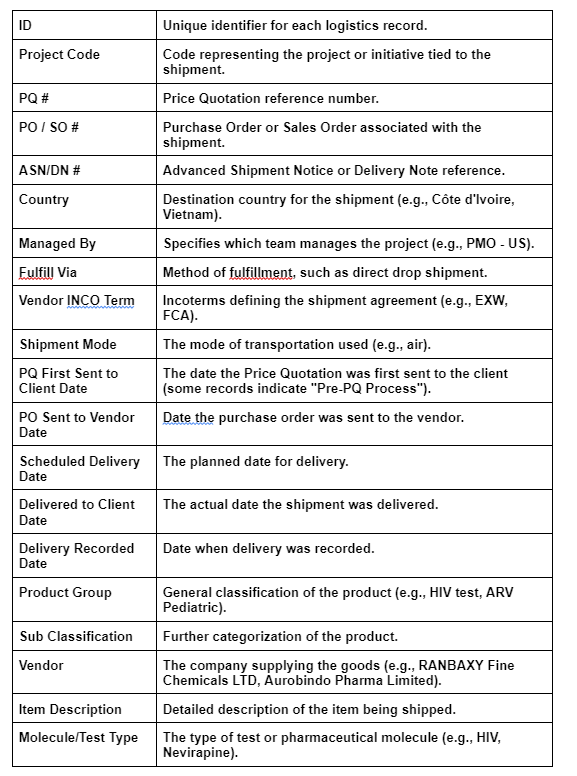

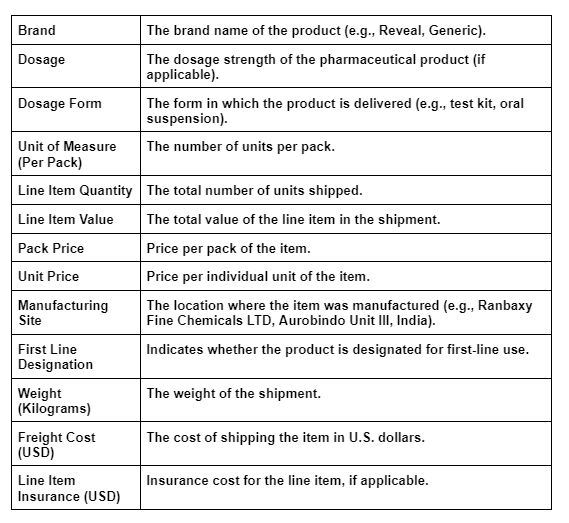


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('(Rows, Columns) of Supply Chain Management System Dataset- ', logistics.shape)

### Dataset Information

In [ ]:
# Dataset Info
print('Information about SCMS Dataset:\n')
print(logistics.info())

### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'No. of duplicated values in SCMS Dataset: {logistics.duplicated().sum()}')

### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('Missing values in SCMS Dataset:\n')
print(logistics.isnull().sum())

In [ ]:
# Visualizing Missing Values in a heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(logistics.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

-> The above dataset has 10324 rows and 33 columns.

-> There are text, date and numerical values in the dataset.

-> There are no duplicate values in the dataset.

-> There are missing values in Shipment Mode, Dosage, and Line Item Insurance (USD) columns.

## ***2. Understanding Your Variables***

### Dataset Columns

In [ ]:
# Dataset Columns
print('SCMS Dataset Columns:\n')
print(logistics.columns)

### Dataset Describe (Before Cleaning)

In [ ]:
# initial Dataset Describe
print("SCMS Dataset Describe:\n")
print(logistics.describe())

### Variables Description

📑 Column Descriptions

| Column | Description |
|--------|-------------|
| **ID** | Unique identifier for each record in the dataset. |
| **Project Code** | Code assigned to a specific project under which the delivery falls. |
| **PQ #** | Purchase Quotation number — initial request for pricing from vendor. |
| **PO / SO #** | Purchase Order or Sales Order number — formal order placed with vendor. |
| **ASN/DN #** | Advance Shipping Notice / Delivery Note number — document notifying shipment details. |
| **Country** | Destination country where goods are delivered. |
| **Managed By** | Entity or organization responsible for managing the delivery (e.g., SCMS, third-party). |
| **Fulfill Via** | Method or channel through which the order is fulfilled (e.g., direct vendor, warehouse). |
| **Vendor INCO Term** | International Commercial Terms (Incoterms) agreed with vendor (e.g., FOB, CIF). Defines responsibilities for shipping, insurance, and tariffs. |
| **Shipment Mode** | Mode of transport used (air, sea, road, courier). |
| **PQ First Sent to Client Date** | Date when purchase quotation was first sent to client. |
| **PO Sent to Vendor Date** | Date when purchase order was sent to vendor. |
| **Scheduled Delivery Date** | Planned date for delivery to client. |
| **Delivered to Client Date** | Actual date when goods were delivered to client. |
| **Delivery Recorded Date** | Date when delivery was officially recorded in the system. |
| **Product Group** | Broad category of product (e.g., medicines, diagnostics, consumables). |
| **Sub Classification** | More detailed classification within product group (e.g., antibiotics, test kits). |
| **Vendor** | Supplier or manufacturer providing the product. |
| **Item Description** | Text description of the product item. |
| **Molecule/Test Type** | Active pharmaceutical ingredient or diagnostic test type. |
| **Brand** | Brand name of the product. |
| **Dosage** | Strength of the medicine (e.g., 500 mg). |
| **Dosage Form** | Form in which the product is delivered (tablet, capsule, injection, etc.). |
| **Unit of Measure (Per Pack)** | Measurement unit per pack (e.g., 10 tablets per pack). |
| **Line Item Quantity** | Number of packs/items ordered. |
| **Line Item Value** | Total monetary value of the line item (quantity × unit price). |
| **Pack Price** | Price per pack. |
| **Unit Price** | Price per individual unit (if applicable). |
| **Manufacturing Site** | Location where the product was manufactured. |
| **First Line Designation** | Indicates if the product is a first-line treatment (priority medicine). |
| **Weight (Kilograms)** | Weight of the shipment in kilograms. |
| **Freight Cost (USD)** | Cost of transporting the shipment. |
| **Line Item Insurance (USD)** | Insurance cost for the shipment line item. |





### Number of unique values in each column

In [ ]:
print(logistics.nunique())

### Understanding of variables

-> Some columns like 'Freight Cost' and 'Weight' will likely require data cleaning and/or data type conversion for numerical analysis.

-> The date columns in the dataset need to be converted to Date dtype.

-> There are missing values in Shipment Mode, Dosage, and Line Item Insurance (USD) columns.


*   There cannot be missing values in Shipment Mode. As the number of rows are less, they would be dropped.
*   The null values in Line Item Insurance (USD) are valid, may need to be filled with appropriate values.
*   The null values in Dosage don't matter as the column will be dropped.



**Columns to be dropped**

-> Following columns are unnecessary for EDA and can be dropped.
1) **ID**: Just a row identifier, no analytical meaning. But we need it first to evaluate some values in Weight and Freight costs. SO we will drop it after Data Wrangling.

2) **Project Code**: refers to the actual source code of a software project, nothing to analyse about with regards to supply chain operations, delivery timelines and cost reduction; Quite redundant when we're analyzing by country/vendor/product.

3) **PQ #, PO / SO #, ASN/DN #**: Transactional identifiers, useful for traceability but not for statistical analysis.

4) **Managed By**: Project management team, unnecessary just like the project code, as it is not necessary for the transaction

5) **Delivery Recorded Date**: This values is not necessary for the analysis.

6) **Item Description**: Very verbose text, redundant with Molecule/Test Type and Brand.

7) **Dosage**: The medical dosage will be according to medical prescription/need and irrelevant for analysis.

8) **Unit of Measure (Per Pack), Pack Price, Unit Price**: Redundant as already have Line Item Quantity and Line Item Value

9) **First Line Designation**: Whether the product is for first-line use or according to prescription is irrelevant for shipment and delivery analysis

**New Columns to be added**


1.   **Delivery Delay** : To know the gap between Scheduled Delivery Date and the actual Delivery Date
2.   **Total Cost** : To Calculate the total cost of each shipment



### Drop unnecessary columns

In [ ]:
# Drop the above listed unnecessary columns except 'ID'.

logistics.drop(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Managed By',  'Delivery Recorded Date', 'Item Description', 'Dosage', 'First Line Designation', 'Unit of Measure (Per Pack)', 'Pack Price', 'Unit Price'], axis = 1, inplace = True)

In [ ]:
# Remaining columns
print(logistics.columns)

### Check Unique Values of variables.

In [ ]:
# Unique values in all columns other than 'ID'

for col in logistics.columns:
    if col in ['ID']:
        pass
    else:
        print(f'{col} - {logistics[col].unique()}\n')

## ***3. Data Wrangling***

### **Data Cleaning on columns with Null values**

#### Column - **Shipment Mode**

In [ ]:
# Number of columns having 'Shipment Mode' as Null
print(len(logistics.loc[(logistics['Shipment Mode'].isnull())]))

Shipment Mode cannot be null, so we can drop those rows

In [ ]:
# Drop the rows where 'Shipment Mode' is Null
logistics.dropna(subset=['Shipment Mode'], inplace=True)

#### Column - **Line Item Insurance (USD)**

In [ ]:
# Number of columns having 'Line Item Insurance (USD)' as Null
print(len(logistics.loc[(logistics['Line Item Insurance (USD)'].isnull())]))

Having Line Item Insurance (USD) as null implies that there is no insurance associated with the line item. Hence we will set Line Item Insurance (USD)to 0.0

In [ ]:
# Change null value in 'Line Item Insurance (USD)' to 0.0
logistics['Line Item Insurance (USD)'] = logistics['Line Item Insurance (USD)'].fillna(0.0)

### **Data Cleaning of Invalid entries in various columns**

#### Column - **PQ First Sent to Client Date**

There are two non-date values -


*   'Pre-PQ Process'
*   'Date Not Captured'

We will assign Null value to both of them, indicating that the purchase quotation was not sent to the Client, and that the shipment started from the Purchase Order from the Client.


In [ ]:
len(logistics.loc[(logistics['PQ First Sent to Client Date']=='Date Not Captured') | (logistics['PQ First Sent to Client Date']=='Pre-PQ Process')])

In [ ]:
logistics['PQ First Sent to Client Date'] = logistics['PQ First Sent to Client Date'].replace(['Date Not Captured', 'Pre-PQ Process'], np.nan)

#### Column - **PO sent to vendor date**

There are two non-date values-  
* 'Date Not Captured'
* 'N/A - From RDC'

In [ ]:
print(len(logistics.loc[logistics['PO Sent to Vendor Date']=='Date Not Captured',['PO Sent to Vendor Date', 'Vendor', 'Scheduled Delivery Date']]))

In [ ]:
print(len(logistics.loc[logistics['PO Sent to Vendor Date']=='N/A - From RDC',['PO Sent to Vendor Date', 'Vendor', 'Scheduled Delivery Date']]))

We can see many deliveries have been made from RDC (Regional Distribution Centers). They will not have a 'PO sent to Vendor Date'.  

But other few rows have Vendors but no date where PO has been sent to them. Such rows are invalid and are to be dropped. This is because we need the correct date PO has been sent to Vendor as a part of transaction streamline.

In [ ]:
# Drop the rows with 'PO sent to vendor date' as 'Date Not Captured'
logistics.drop(logistics.loc[logistics['PO Sent to Vendor Date']=='Date Not Captured'].index, inplace=True)

In [ ]:
logistics['PO Sent to Vendor Date'] = pd.to_datetime(logistics['PO Sent to Vendor Date'], format="%m/%d/%y", errors='coerce')

In [ ]:
logistics['PO Sent to Vendor Date'].isna().sum()

The 'PO Sent to Vendor Date' column has 5092 missing values because these entries originally contained 'N/A - From RDC'. This indicates that the shipments originated from a Regional Distribution Center, meaning a Purchase Order was not sent to an external vendor. When the column was converted to a datetime format, these 'N/A - From RDC' values were coerced into NaT (Not a Time), which is treated as a missing value (NaN) in pandas.

### Columns - **Scheduled Delivery Date, Delivered to Client Date**

We shall also convert these columns into datetime dtype

In [ ]:
logistics['Scheduled Delivery Date'] = pd.to_datetime(logistics['Scheduled Delivery Date'], format="%d-%b-%y", errors='coerce')

In [ ]:
logistics['Delivered to Client Date'] = pd.to_datetime(logistics['Delivered to Client Date'], format="%d-%b-%y", errors='coerce')

#### Columns - **Vendor INCO Term, Fulfill Via**

In [ ]:
print(logistics.loc[logistics['Vendor INCO Term']=='N/A - From RDC', 'Fulfill Via'].unique())

print(logistics.loc[logistics['Fulfill Via']=='From RDC', 'Vendor INCO Term'].unique())

This confirm that these two columns are consistent with each other in case the shipment is an RDC. Hence, no change necessary

In [ ]:
print(logistics.loc[(logistics['PO Sent to Vendor Date'].isnull()), 'Fulfill Via'].unique())

print(logistics.loc[~(logistics['PO Sent to Vendor Date'].isnull()), 'Fulfill Via'].unique())

Also consistent with 'PO Sent to Vendor Date', i.e., If a shipment is collected from RDC, then it is fulfilled via 'Direct Drop'

#### Column - **Weight (Kilograms)**



In [ ]:
ids_with_ref_weight = list(logistics.loc[logistics['Weight (Kilograms)'].str.startswith('See'),'ID'])

print(ids_with_ref_weight)

In [ ]:
reference_text = logistics.loc[logistics['ID'].isin(ids_with_ref_weight), 'Weight (Kilograms)']

print(reference_text)

In [ ]:
def extract_id(ref_txt):
    return int(re.search(r"ID#:(\d+)", ref_txt).group(1))

ref_ids = list(reference_text.apply(extract_id))

print(ref_ids)

In [ ]:
for x,y in zip(ids_with_ref_weight, ref_ids):
    logistics.loc[logistics['ID']==x, 'Weight (Kilograms)'] = logistics.loc[logistics['ID']==y, 'Weight (Kilograms)'].values[0]

To deal with rows having 'Weight (Kilograms)' = 'Weight Captured Separately', we will impute missing weights using the median per Product Group.

In [ ]:
# Step 1: Replace placeholder text with NaN
logistics['Weight (Kilograms)'] = logistics['Weight (Kilograms)'].replace(
    ['Weight Captured Separately'], np.nan)

In [ ]:
# Step 2: Convert to numeric
logistics['Weight (Kilograms)'] = pd.to_numeric(logistics['Weight (Kilograms)'], errors='coerce')

In [ ]:
# Step 3: Impute missing weights with median per Product Group
logistics['Weight (Kilograms)'] = logistics.groupby('Product Group')['Weight (Kilograms)'].transform(
    lambda x: x.fillna(x.median())
)

#### Column - **Freight Cost (USD)**

In [ ]:
ids_with_ref_freight = list(logistics.loc[logistics['Freight Cost (USD)'].str.startswith('See'),'ID'])

print(ids_with_ref_freight)

In [ ]:
reference_freight_text = logistics.loc[logistics['ID'].isin(ids_with_ref_freight), 'Freight Cost (USD)']

print(reference_freight_text)

In [ ]:
ref_ids = list(reference_freight_text.apply(extract_id))

print(ref_ids)

In [ ]:
for x,y in zip(ids_with_ref_freight, ref_ids):
    logistics.loc[logistics['ID']==x, 'Freight Cost (USD)'] = logistics.loc[logistics['ID']==y, 'Freight Cost (USD)'].values[0]

To deal with rows having 'Freight Cost (USD)' = 'Freight Included in Commodity Cost', we will fill it with 0.0, as the freight will already be calculated in the total cost.

In [ ]:
logistics['Freight Cost (USD)'] = pd.to_numeric(logistics['Freight Cost (USD)'], errors='coerce')

In [ ]:
logistics['Freight Cost (USD)'] = logistics['Freight Cost (USD)'].fillna(0.0)

### New Column - **Delivery Delay**

In [ ]:
logistics['Delivery Delays(days)'] = (logistics['Scheduled Delivery Date'] - logistics['Delivered to Client Date']).dt.days

With above code, if the delivery is done ahead of scheduled date, it will be positive; else negative.

In [ ]:
logistics.loc[logistics['Scheduled Delivery Date']!=logistics['Delivered to Client Date'], ['Scheduled Delivery Date','Delivered to Client Date','Delivery Delays(days)']].head()

#### New Column - **Total Cost**

Total cost = 'Line Item Value' + 'Freight Cost (USD)' + 'Line Item Insurance (USD)'

In [ ]:
logistics['Total Cost'] = logistics['Line Item Value'] + logistics['Freight Cost (USD)'] + logistics['Line Item Insurance (USD)']

### Column drop - **ID**

In [ ]:
# drop the ID column, as it has no relevance to analysis
logistics.drop('ID',axis=1,inplace=True)

### **Final Look at The Dataset after Data Wrangling**

In [ ]:
logistics.shape

In [ ]:
logistics.info()

In [ ]:
logistics.describe()

### What all manipulations have you done and insights you found?

I Did Data Cleaning.

*   'Shipment Mode' cannot be null, so the rows having 'Shipment Mode' as Null have been dropped.

*   Null values in 'Line Item Insurance (USD)' have been set to 0.0, indicating no insurance.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***